In [1]:
from datascience import *
path_data = '../assets/data/'
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# 10.0 Sampling

In [2]:
top1 = Table.read_table(path_data + 'top_movies_2017.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [5]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937
19,The Sting,Universal,"156,000,000","792,480,000",1973
29,Thunderball,United Artists,"63,595,658","664,972,000",1965
39,Home Alone,Fox,"285,761,243","602,157,000",1990
49,Bambi,RKO,"102,247,150","566,403,700",1942
59,The Greatest Showman on Earth,Paramount,"36,000,000","533,400,000",1952
69,Tootsie,Columbia,"177,200,000","505,876,000",1982
79,Rocky,United Artists,"117,235,147","489,305,400",1976
89,One Flew Over the Cuckoo's Nest,United Artists,"108,981,275","477,262,800",1975
99,Duel in the Sun,Selz.,"20,408,163","453,571,400",1946


0 ~ 9 사이의 수를 선택해, 해당 수를 기준으로 10단위로 선택(샘플링)

# 10.1 Empirical Distribution (경험적 분포)

In [7]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


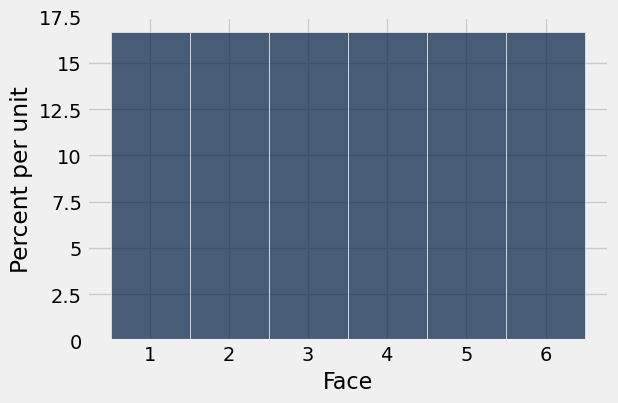

In [8]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)
plots.show()

확률적 분포에서는 다음과 같이, 1 ~ 6의 주사위를 굴렸을때 각 수가 나올 확률은 16.7%로 동일하다.

In [9]:
die.sample(10)

Face
2
3
3
5
5
2
2
1
6
3


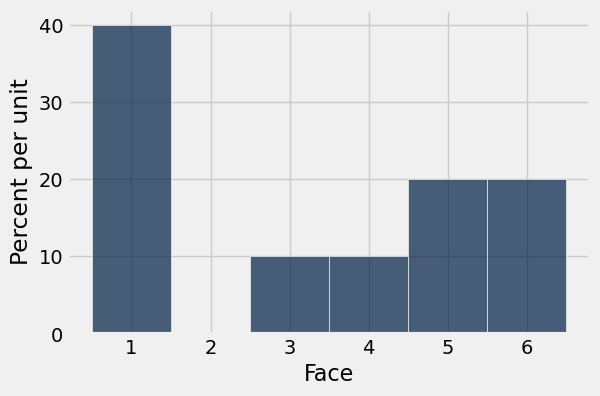

In [11]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)
    plots.show()
empirical_hist_die(10)

경험적 분포에서는 다음과 같이, 10번 샘플링 하여 나온 주사위의 눈의 수를 시각화 할 수 있다.

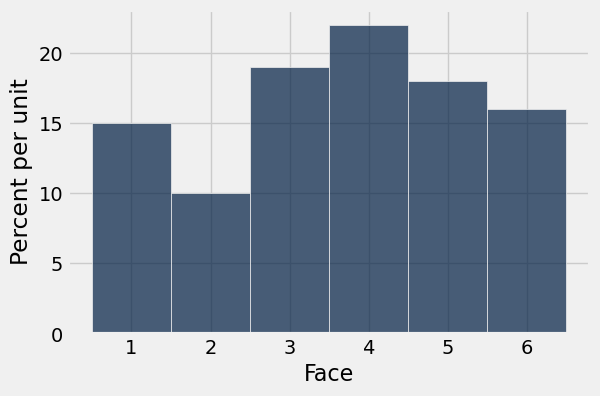

In [12]:
empirical_hist_die(100)

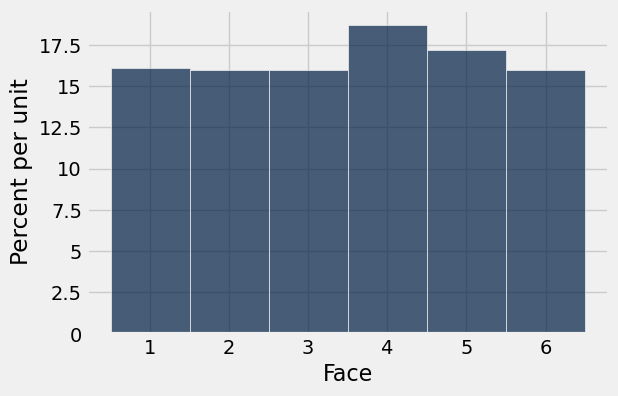

In [13]:
empirical_hist_die(1000)

이런 식으로 경험에 의한 확률 분포를 **empirical distribution (경험적 분포 함수)** 라고 한다.

# 10.2 Sampling from a Population (모집단에서 샘플링하기)

In [14]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


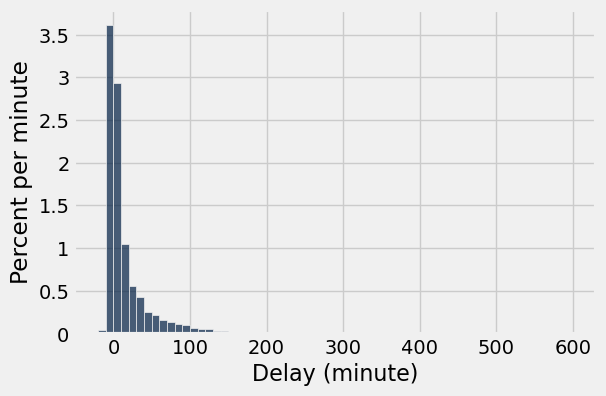

In [15]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.show()

In [17]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

비행 지연 시간의 분포는 다음과 같다. 200 이상에 대해서는 거의 없는 것으로 보아 제거한다.

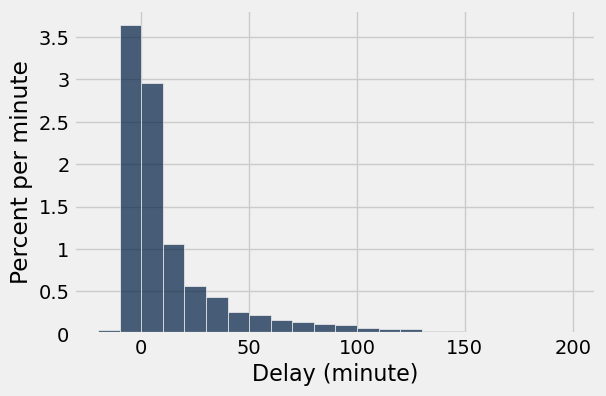

In [16]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.show()

0 ~ 10의 구간은 약 3%로 확인된다. 이 막대의 면적은 30으로 전체의 약 30%를 차지하는 것을 알 수 있다.

In [19]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

### 샘플의 경험적 분포

In [20]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')
    plots.show()

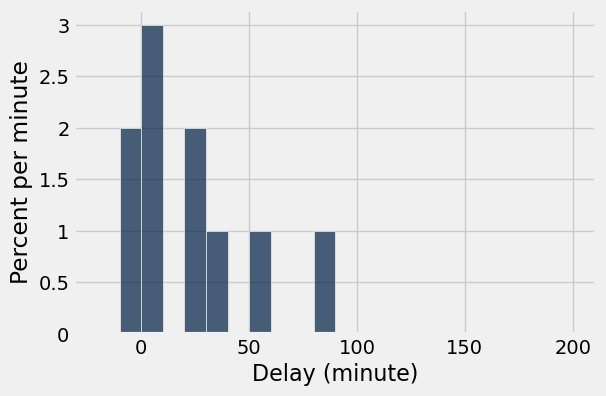

In [21]:
empirical_hist_delay(10)

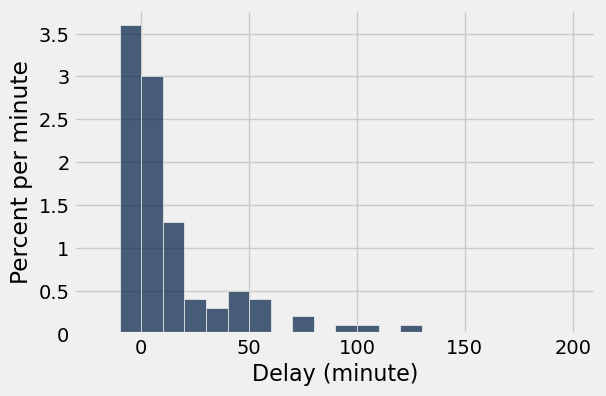

In [22]:
empirical_hist_delay(100)

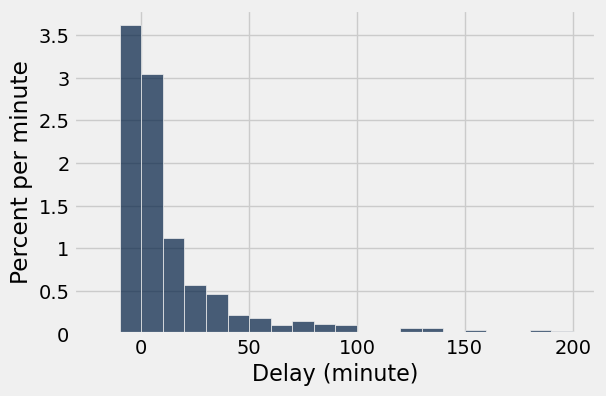

In [23]:
empirical_hist_delay(1000)

샘플의 수가 많아질 수록, 모집단의 분포를 따라가는 것을 볼 수 있다.

# 10.3 Empirical Distribution of a Statistic (통계의 경험적 분포)

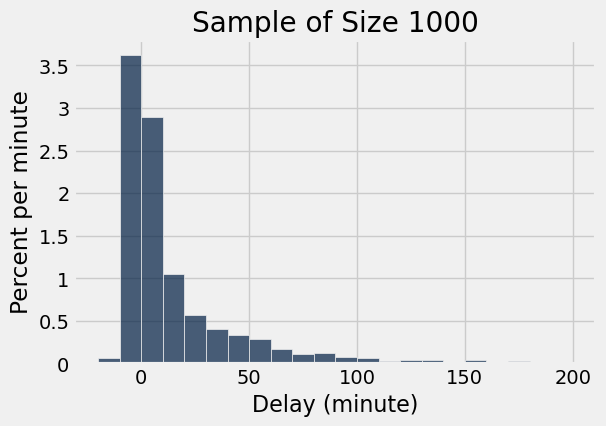

In [24]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000')
plots.show()

### 매개변수

In [25]:
np.median(united.column('Delay'))

2.0

In [26]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

전체 50%의 항공권은 약 2분의 출발 지연을 겪었다.

In [27]:
np.median(united.sample(1000).column('Delay'))

3.0

하지만 sampling 된 데이터 집단에서는 약 3분의 출발 지연을 겪었다.

### Simulating a Statistic

시뮬레이션을 연구하기 시작할 때 이전 장에서 설정한 단계를 사용하여 샘플 중앙값을 시뮬레이션할 것입니다. 샘플 크기 1000을 다른 샘플 크기로, 샘플 중앙값을 다른 통계로 대체할 수 있습니다.

**1단계: 시뮬레이션할 통계를 결정합니다.** 우리는 이미 그렇게 결정했습니다: 비행 지연 인구에서 추출한 크기 1000의 무작위 표본의 중앙값을 시뮬레이션할 것입니다.

**2단계: 통계의 시뮬레이션 값을 하나 반환하는 함수를 정의합니다.** 크기가 1000인 무작위 샘플을 그려서 샘플의 중앙값을 계산합니다. 위의 코드 셀에서 이 작업을 수행했습니다. 여기 다시 함수에 캡슐화되어 있습니다.

In [28]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

**단계 3: 생성된 값을 결정합니다.** 5만 반복합시다.

**단계 4: 시뮬레이션 값을 사용하여 시뮬레이션 값을 생성합니다.** 평소처럼, 우리는 결과를 수집하기 위해 빈 어레이를 만들 것입니다.그러면 시뮬레이션 값을 생성하기 위한 루프를 설정할 것이다.루프의 몸체는 표본 중위수의 시뮬레이션 값을 생성하고, 수집 어레이에 적용할 수 있습니다.

시뮬레이션은 실행 가능한 시간이 걸립니다.그것은 크기 1000과 컴퓨팅 중위수를 계산하는 과정에서 5000 반복이 반복되기 때문이다.그것은 샘플링과 반복이다!...

In [29]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [30]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
2
2.5
2.5
2
3
2
2
2
2


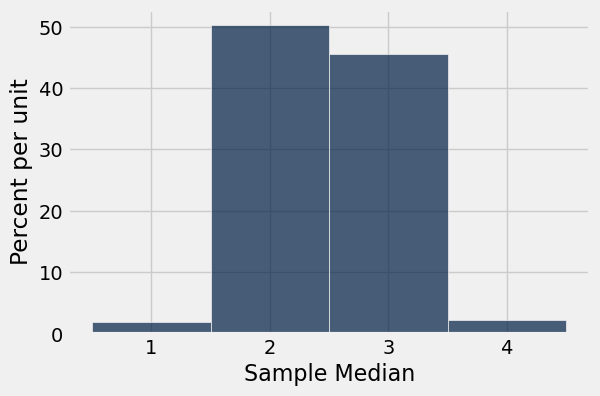

In [31]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))
plots.show()

# 10.4 Random Sampling in Python

### 범주형 분포에서 샘플링

In [32]:
# Species distribution of flower colors:
# Proportions are in the order Red, Pink, White
species_proportions = [0.25, 0.5, .25]

sample_size = 300

# Distribution of sample
sample_distribution = sample_proportions(sample_size, species_proportions)
sample_distribution

array([ 0.26333333,  0.51666667,  0.22      ])

### ex) random, choice 등의 샘플링과 sample_proportions() 비교

with_replacement가 적용된 샘플링이냐에 대한 차이점이 있다.

예를들어 1000개의 데이터 중에서 [0.25, 0.5, 0.25]의 분포를 가지고 있다고 가정하였을 때, with_replacement가 적용되지 않는다면 하나의 데이터를 뽑을 때 마다 확률이 달라지는 오류 발생.

즉, 정확성을 위해 1000개의 데이터를 동일한 확률로 샘플링을 시행하기 위해 with_replacement 시행을 활용한다.

A : 250개, B : 250개, C : 500개가 있다고 가정. 총 1000개

50%의 확률로 C를 하나 뽑았다. -> C : 499개

전체 999개 중 하나를 뽑는다.

이떄의 C가 나올 확률은 50%보다 작아진다.

따라서 이러한 오류를 막고자 with_replacement가 적용된 샘플링 기법을 활용해야 한다.